<a href="https://colab.research.google.com/github/AdeelAhmad201/AdeelAhmad201/blob/main/ML_Internship_Project__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
#ignore warnings
import warnings
warnings.simplefilter(action = "ignore", category =FutureWarning)

In [2]:
full_data = pd.read_csv('/content/tsk_1data.csv')

In [3]:
full_data.shape

(244, 7)

In [4]:
full_data.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


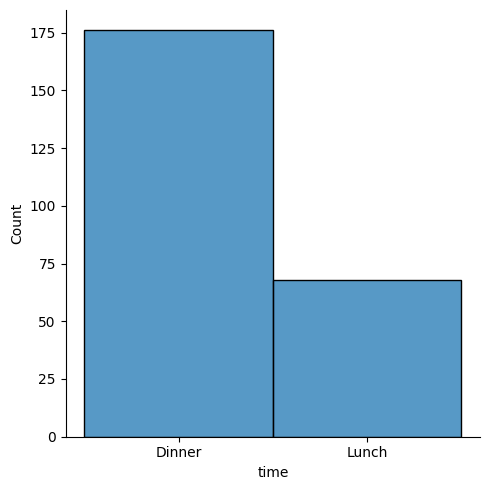

In [5]:
sns.displot(full_data['time'],kde=False)
plt.show()

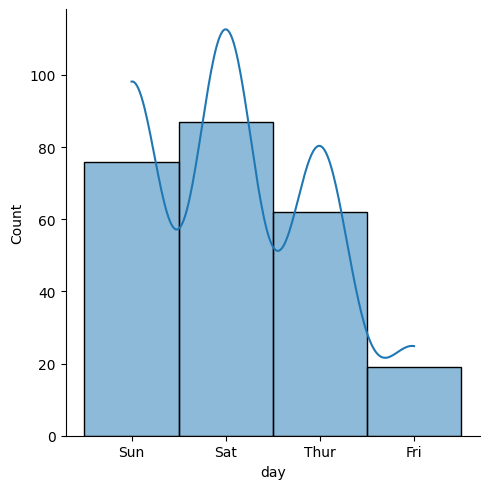

In [6]:
sns.displot(full_data['day'],kde=True)
plt.show()

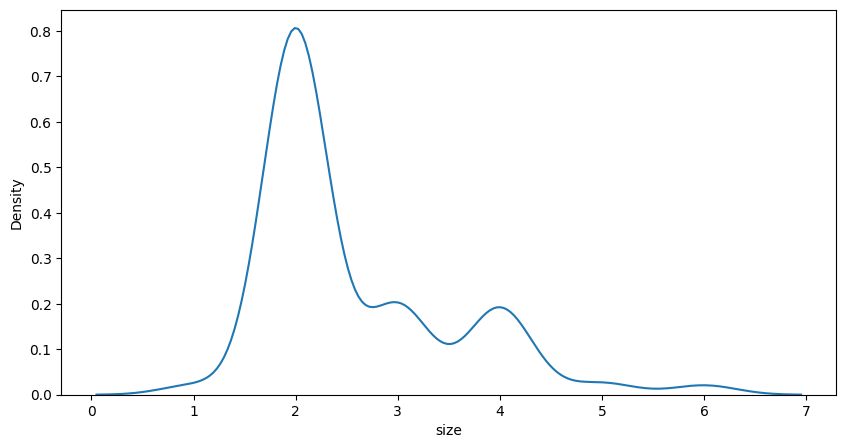

In [7]:
sns.distplot(full_data['size'],hist=False)
plt.show()

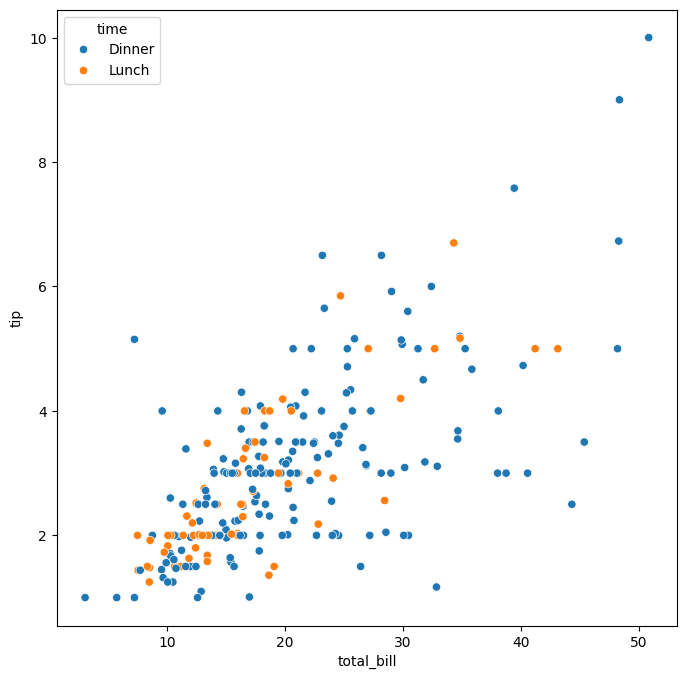

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="total_bill", y="tip", hue="time", data=full_data)
plt.show()

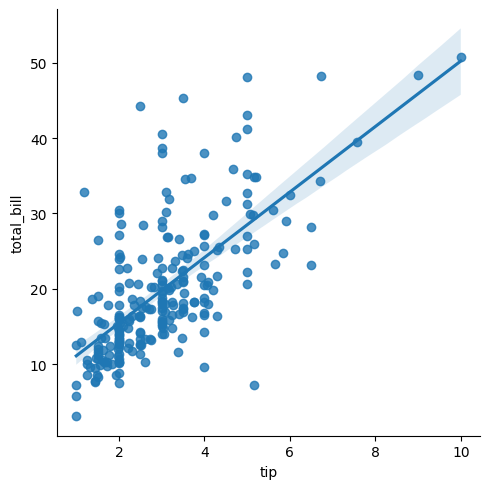

In [8]:
sns.lmplot(x="tip", y="total_bill", data=full_data)
plt.show()

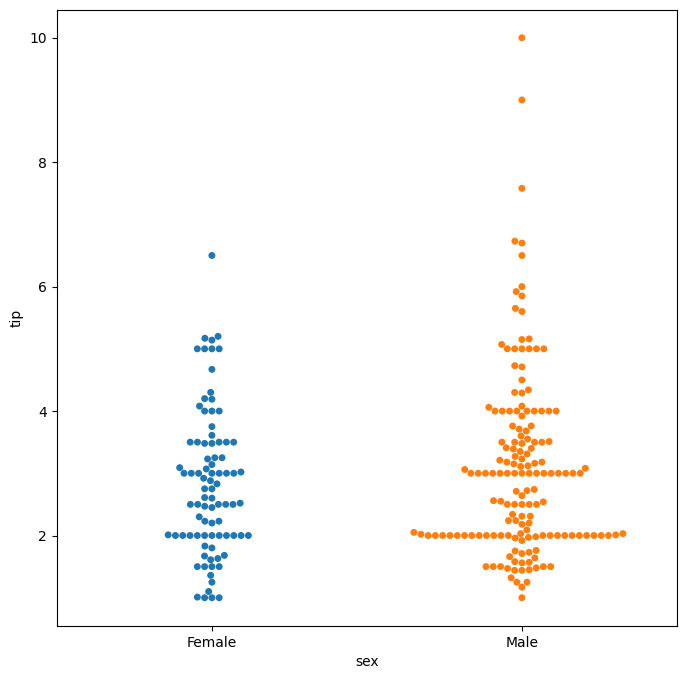

In [9]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="sex", y="tip",hue='sex', data=full_data)
plt.show()

In [10]:
sex = pd.get_dummies(full_data['sex'], drop_first = True) # drop_first prevents multi-collinearity
time = pd.get_dummies(full_data['time'], drop_first = True)
day = pd.get_dummies(full_data['day'], drop_first = True)

In [11]:
full_data = pd.concat([full_data, sex, time, day], axis = 1)

In [12]:
full_data['Sat'] = full_data['Sat'].astype(int)
full_data['Sun'] = full_data['Sun'].astype(int)
full_data['Thur'] = full_data['Thur'].astype(int)
full_data['Lunch'] = full_data['Lunch'].astype(int)
full_data['Male'] = full_data['Male'].astype(int)

In [13]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
 7   Male        244 non-null    int64  
 8   Lunch       244 non-null    int64  
 9   Sat         244 non-null    int64  
 10  Sun         244 non-null    int64  
 11  Thur        244 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 23.0+ KB


In [14]:
full_data.drop(['sex','day','time','smoker'], axis=1, inplace= True)

In [15]:
full_data

,total_bill,tip,size,Male,Lunch,Sat,Sun,Thur
0,16.99,1.01,2,0,0,0,1,0
1,10.34,1.66,3,1,0,0,1,0
2,21.01,3.50,3,1,0,0,1,0
3,23.68,3.31,2,1,0,0,1,0
4,24.59,3.61,4,0,0,0,1,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,1,0,0
240,27.18,2.00,2,0,0,1,0,0
241,22.67,2.00,2,1,0,1,0,0
242,17.82,1.75,2,1,0,1,0,0


In [16]:
full_data.describe()

,total_bill,tip,size,Male,Lunch,Sat,Sun,Thur
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.643443,0.278689,0.356557,0.311475,0.254098
std,8.902412,1.383638,0.951100,0.479967,0.449276,0.479967,0.464049,0.436248
min,3.070000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.347500,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.795000,2.900000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,24.127500,3.562500,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,50.810000,10.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# x = full_data.drop('tip',axis=1)
x = full_data[['total_bill']]
y= full_data['tip']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= .10, random_state= 101)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
lin_reg= LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(25,)
[2.28544641 2.77842389 2.41054607 3.50039735 3.61913601 2.03524709
 6.01723288 2.53458557 1.66206845 1.77868678 3.1113162  2.74449856
 1.79564944 2.32573275 2.48475774 2.49005857 2.67664789 3.46647202
 2.15186542 2.68830973 2.45507307 3.96475032 4.37397464 2.31301075
 4.3813958 ]


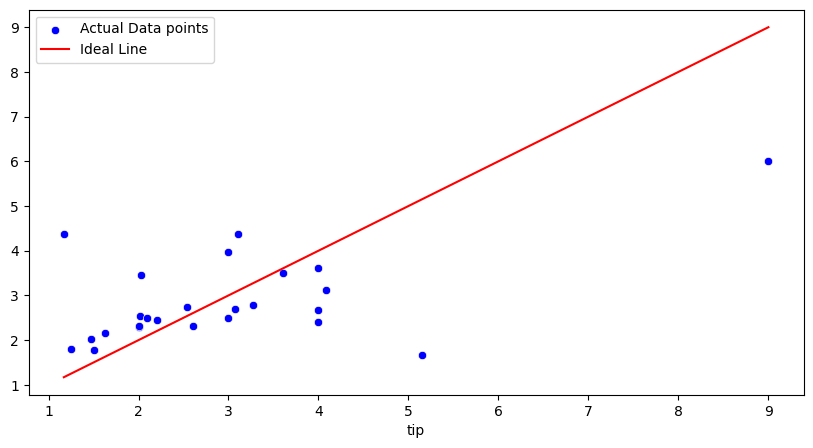

In [21]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [22]:
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
          2.00 |          2.29
          3.27 |          2.78
          4.00 |          2.41
          3.61 |          3.50
          4.00 |          3.62
          1.47 |          2.04
          9.00 |          6.02
          2.02 |          2.53
          5.15 |          1.66
          1.50 |          1.78
          4.08 |          3.11
          2.54 |          2.74
          1.25 |          1.80
          2.00 |          2.33
          2.09 |          2.48
          3.00 |          2.49
          4.00 |          2.68
          2.03 |          3.47
          1.63 |          2.15
          3.07 |          2.69
          2.20 |          2.46
          3.00 |          3.96
          1.17 |          4.37
          2.61 |          2.31
          3.11 |          4.38


In [23]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 1.7491850089749281
Root Mean Squared Error: 1.3225675820066543
